In [5]:
import pandas as pd

# Lod the  Data

In [6]:
Fake=pd.read_csv("Fake.csv")
true=pd.read_csv("True.csv")

- Give the fake news label 0 :

In [7]:
Fake['label']=0

In [8]:
Fake

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


- Give the true news label 1 :

In [9]:
true['label']=1

In [10]:
true

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


- Delete unneeded columns

In [11]:
Fake.drop(columns=["title","date","subject"],inplace=True)
true.drop(columns=["title","date","subject"],inplace=True)

In [12]:
Fake.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [13]:
true.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


- Add the two data frame in one datarame

In [14]:
News=pd.concat([Fake,true],ignore_index=True)
News

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,1


- Check for cleaning data

In [15]:
News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [16]:
News.isnull().sum()

text     0
label    0
dtype: int64

In [17]:
News.duplicated().sum()

6251

In [18]:
News.drop_duplicates(inplace=True)
News.duplicated().sum()

0

# preprocessing the text n the data:

In [19]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
import os

# Download required NLTK resources
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

- this function for cleaning the text in the dataframe from any strange character and abstract all words to the original and return the unique words in each sentence:

In [20]:

def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Remove extra white space from text

    text = re.sub(r'\W', ' ', str(text)) # Remove all the special characters from text

    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Remove all single characters from text

    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove any character that isn't alphabetical

    text = text.lower()

    words = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stop_words = set(stopwords.words("english"))
    Words = [word for word in words if word not in stop_words]

    Words = [word for word in Words if len(word) > 3]

    indices = np.unique(Words, return_index=True)[1]
    cleaned_text = np.array(Words)[np.sort(indices)].tolist()

    return cleaned_text

In [21]:
x=News.drop('label',axis=1)
y=News.label

- make the column of the text in dataframe to list:

In [22]:
texts=list(x['text'])

- call the function to cleaning the texts in this list:

In [23]:
cleaned_text = [process_text(text) for text in texts]

In [24]:
print(cleaned_text[:10])

[['donald', 'trump', 'wish', 'american', 'happy', 'year', 'leave', 'instead', 'give', 'shout', 'enemy', 'hater', 'dishonest', 'fake', 'news', 'medium', 'former', 'reality', 'show', 'star', 'country', 'rapidly', 'grows', 'stronger', 'smarter', 'want', 'friend', 'supporter', 'even', 'healthy', 'president', 'angry', 'pant', 'tweeted', 'great', 'america', 'realdonaldtrump', 'december', 'tweet', 'went', 'welll', 'expect', 'kind', 'sends', 'greeting', 'like', 'despicable', 'petty', 'infantile', 'gibberish', 'lack', 'decency', 'allow', 'rise', 'gutter', 'long', 'enough', 'citizen', 'bishop', 'talbert', 'swan', 'talbertswan', 'calvin', 'calvinstowell', 'impeachment', 'would', 'make', 'also', 'accept', 'regaining', 'control', 'congress', 'miranda', 'yaver', 'mirandayaver', 'hear', 'talk', 'include', 'many', 'people', 'hate', 'wonder', 'alan', 'sandoval', 'alansandoval', 'word', 'marlene', 'koren', 'pollitt', 'korencarpenter', 'including', 'fought', 'lost', 'badly', 'know', 'love', 'nothing', 'd

# split the texts and the labels of the fake and real news:

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_text, y, test_size=0.2, random_state=42)

- tokenize the all words in the data and transform them to be sequences:

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_idx = tokenizer.word_index  # Corrected syntax for accessing word index
v = len(word_idx)
print("the size of vocab =", v)  # Corrected spacing
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


the size of vocab = 91536


- make each sentence has lengthe 150 if te sentence s less than this length we fill it with zeros , if iit is bigger we remove the rest of the sentnces:

In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 150
X_train = pad_sequences(X_train,maxlen=maxlen)
X_test = pad_sequences(X_test,maxlen=maxlen)



In [28]:
y.value_counts()

label
1    21192
0    17455
Name: count, dtype: int64

- build the model

In [29]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, GRU, Bidirectional, Dense, Input, GlobalMaxPooling1D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam




In [30]:
# Define input shape
inputt = Input(shape=(maxlen,))
learning_rate = 0.0001

# Embedding layer
x = Embedding(v+1, 100)(inputt)
x = Dropout(0.5)(x)

# First BiLSTM layer
x = Bidirectional(LSTM(150, return_sequences=True))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Second BiGRU layer
x = Bidirectional(GRU(100, return_sequences=True))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Global Max Pooling
x = GlobalMaxPooling1D()(x)

# Dense layers for classification
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

# Define the model
model = Model(inputt, x)

# Compile the model
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 150, 100)       │     9,153,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 150, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 150, 300)       │       301,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 300)       │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 150, 300)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 150, 200)       │       241,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 150, 200)       │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 150, 200)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 200)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,724,086 (37.09 MB)

 Trainable params: 9,723,086 (37.09 MB)

 Non-trainable params: 1,000 (3.91 KB)

-make label encoder to the labels to pass it to the model:

In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


transform it to be categorical

In [32]:
import tensorflow as tf

y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)

# train the model:

In [ ]:

history = model.fit(X_train, y_train_one_hot, epochs=5, validation_data=(X_test, y_test_one_hot))


Epoch 1/5
967/967 ━━━━━━━━━━━━━━━━━━━━ 603s 617ms/step - accuracy: 0.6366 - loss: 0.9110 - val_accuracy: 0.9592 - val_loss: 0.1359
Epoch 2/5
967/967 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.9520 - loss: 0.1287

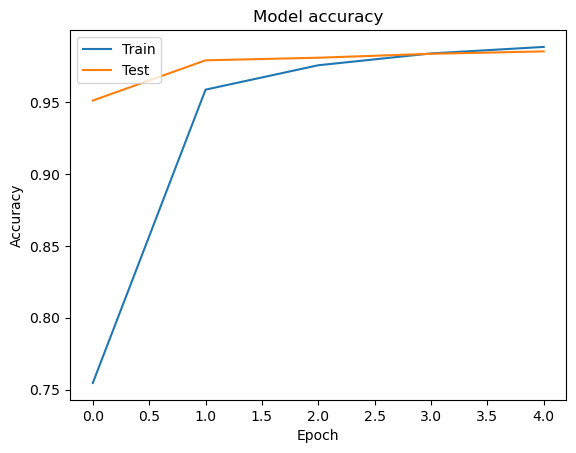

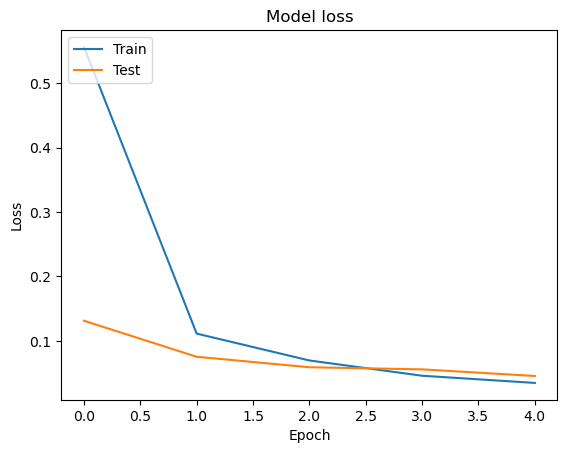

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Accuracy:

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test_one_hot)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


242/242 ━━━━━━━━━━━━━━━━━━━━ 37s 155ms/step - accuracy: 0.9877 - loss: 0.0405
Test Loss: 0.045460306107997894
Test Accuracy: 0.9851229190826416


242/242 ━━━━━━━━━━━━━━━━━━━━ 33s 132ms/step


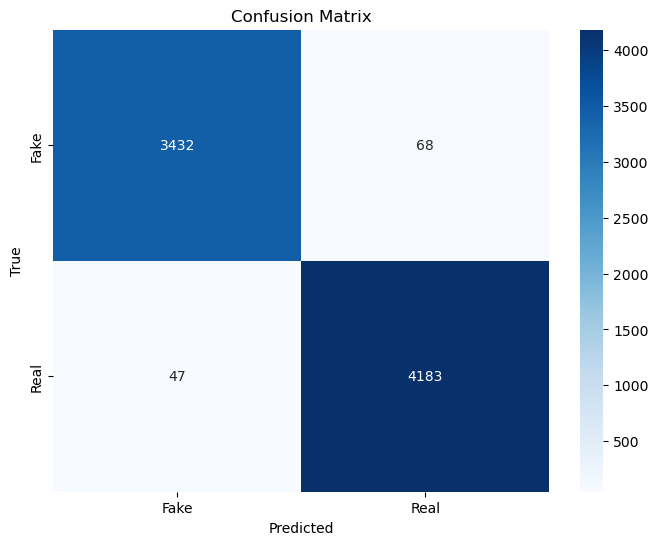

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fake', 'Real'], 
            yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Classification Report:
              precision    recall  f1-score   support

        Fake       0.99      0.98      0.98      3500
        Real       0.98      0.99      0.99      4230

    accuracy                           0.99      7730
   macro avg       0.99      0.98      0.98      7730
weighted avg       0.99      0.99      0.99      7730

Model Accuracy: 0.9851


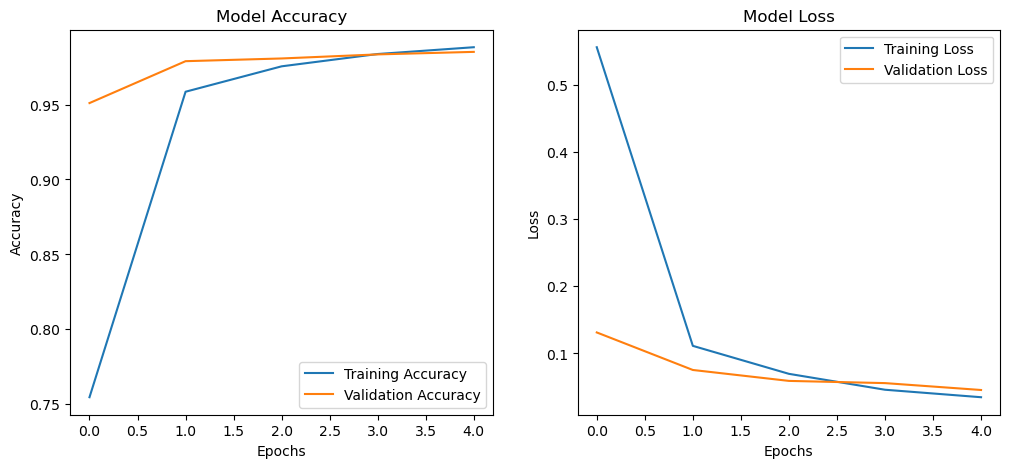

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Generate classification report
print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=['Fake', 'Real']))

# Compute accuracy
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print(f"Model Accuracy: {accuracy:.4f}")

# Plot Training History (Accuracy & Loss)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy plot
ax[0].plot(history.history['accuracy'], label='Training Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].legend()

# Loss plot
ax[1].plot(history.history['loss'], label='Training Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('Model Loss')
ax[1].legend()

plt.show()


In [ ]:
y_pred_probs = model.predict(X_test)  # Get probabilities
y_pred_labels = np.argmax(y_pred_probs, axis=1)  # Convert to class labels


242/242 ━━━━━━━━━━━━━━━━━━━━ 27s 109ms/step


In [ ]:
y_pred_text = label_encoder.inverse_transform(y_pred_labels)  # Convert back to 'Fake' or 'Real'


In [ ]:
y_true_labels = label_encoder.inverse_transform(np.argmax(y_test_one_hot, axis=1))  # Convert true labels back


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print("Test Accuracy:", accuracy_score(y_true_labels, y_pred_text))  # Accuracy
print("\nClassification Report:\n", classification_report(y_true_labels, y_pred_text))  # Precision, Recall, F1


Test Accuracy: 0.9851228978007762

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      3500
           1       0.98      0.99      0.99      4230

    accuracy                           0.99      7730
   macro avg       0.99      0.98      0.98      7730
weighted avg       0.99      0.99      0.99      7730



In [ ]:
for i in range(5):  # Print first 5 test examples
    print(f"Text: {X_test[i]}")  # You might want to map this back to actual text if available
    print(f"Actual: {y_true_labels[i]}")
    print(f"Predicted: {y_pred_text[i]}")
    print("-" * 50)


Text: [ 2415     1    88  1077   101   182  3440   751   425    26   422  1884
   360   250   628  2171    80  2876   141  2196   624   283    79   186
   380  7966   395   403 16415   827  5570   309  5939     9   978   473
  2534   399  1685    31    56  9585   530   130    82   639  1752   249
 38215   443   916    99   694    62    45   203  1519  6034  1139    93
  2679  1735    81    61   484   466   276   224   966   481 30806 23321
    71  1409   297  3891   321  9844   334     3  7094  7095    37   505
  4169   623   304   389   454 10086   387  3555  1366  6136   413  4797
   184   293  3187   229   668   176  2298   582   150   889  2465  2404
   106   329   192    20    42  1847  3947  1870  1450   558  4219    16
  9444  1123  9441   754    65   122  3256  2310   188     7  4521  1373
    14    38  1510  1291   169  1305   385  1891  1149   855  4819   236
    36  1830   546  3250  8256  3391]
Actual: 1
Predicted: 1
--------------------------------------------------
Text: 

In [ ]:
model.save("fake_news_model.keras")  # Save as HDF5 file


In [ ]:
import pickle

# Assuming you used a tokenizer (e.g., from TensorFlow/Keras)
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
